In [ ]:
# print(plt.style.available)
# plt.style.use('default')
# plt.style.use('benjamin gray.mplstyle')

# Librairies

In [2]:
%matplotlib notebook    
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
from matplotlib.pyplot import xticks, yticks
import seaborn as sns
#import plotly.express as px
import pywt

import os
import pandas as pd
import numpy as np
import sys 
import glob

import xarray as xr
from datetime import datetime, timedelta
import calendar

import pyet
import pymannkendall as mk

# import spei as si  # si for standardized index
import scipy.stats as scs

font = {'family':'Times New Roman', 'color':'black', 'weight':'normal', 'size': 12 }
output_dir = r'C:\Users\benja\My Drive\DRIVE\THESIS\OBJECTIVES\SO2\HYPE\Result'

gcms = ["CanESM5", "CNRM-CM6-1", "CNRM-ESM2-1", "EC-Earth3", "GFDL-ESM4",
        "IPSL-CM6A-LR", "MIROC6", "MPI-ESM1-2-HR", "MRI-ESM2-0", "UKESM1-0-LL"]

plt.style.use('benjamin gray.mplstyle')
os.getcwd()

'C:\\Users\\benja\\My Drive\\DRIVE\\THESIS\\OBJECTIVES\\SO2\\HYPE\\Script'

# Precipitation (CHIRPS Yearly)

## Plot

<IPython.core.display.Javascript object>


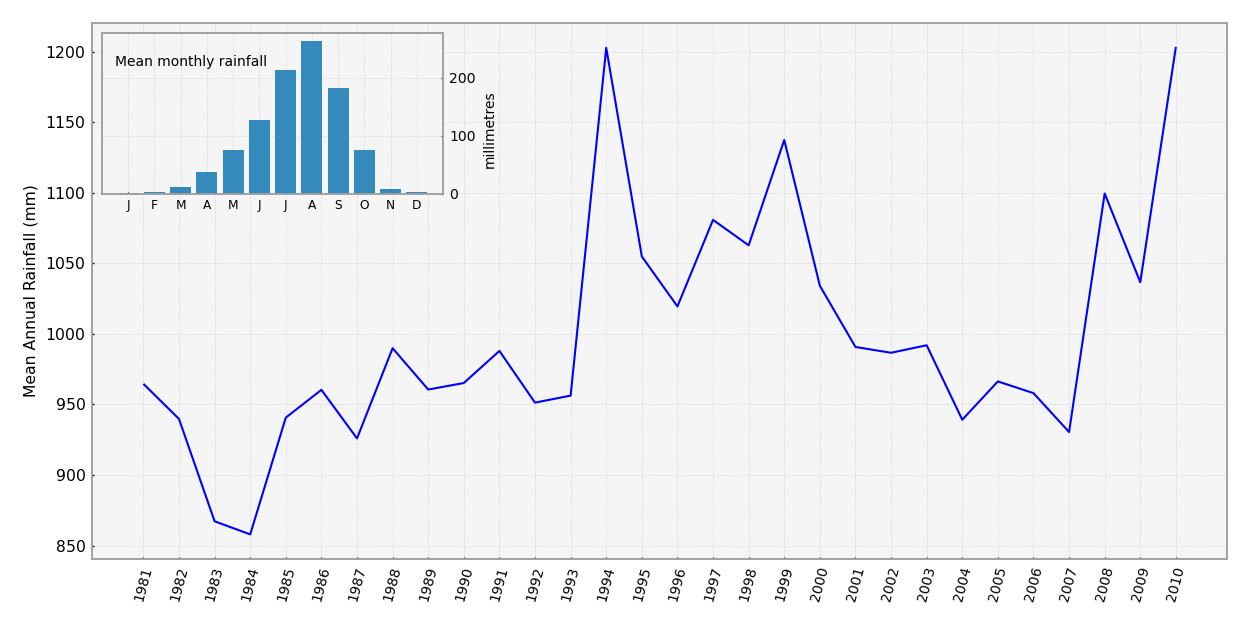

C:\Users\benja\AppData\Local\Temp\ipykernel_9592\2141088935.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout();


In [96]:
start, end  = "1981-01-01", "2010-12-31"
workdir = r"C:\Users\benja\My Drive\DRIVE\THESIS\OBJECTIVES\SO2\HYPE\Result\DWT"
outdir = r"C:\Users\benja\My Drive\DRIVE\THESIS\OBJECTIVES\SO2\HYPE\Result"
Pobs = pd.read_csv(workdir +"/chirps.csv", index_col=[0], parse_dates=True)#.loc[start:end]
df = Pobs.reset_index()

dy = (df
      .groupby(pd.PeriodIndex(df['DATE'], freq='Y'))['CHIRPS']
      .sum().round(2)
      .reset_index()
     )
dm = (df
      .groupby(pd.PeriodIndex(df['DATE'], freq='M'))['CHIRPS']
      .sum().round(2)
      .reset_index()
     )


fig, (axs) = plt.subplots(1, 1, figsize=(10,5))
axs.plot(dy.index, dy["CHIRPS"], linewidth = 1.2, linestyle = "-", color="blue")
ticks = list(range(0, 30)) 
axs.set_xticks(ticks)
xlabels = list(range(1981, 2011))  
axs.set_xticklabels(xlabels, fontsize=8, rotation=75)
axs.set_ylabel("Mean Annual Rainfall (mm)", fontsize = 9)
# axs.set_ylim(1660, 1815)


# ## PLOT THE MONTHLY
Pobs['Month'] = Pobs.index.month
dd = Pobs.groupby(["Month"]).sum()/30
axsins = mpl_il.inset_axes(axs, width = "30%", height = "30%", loc = 2)
axsins.bar(dd.index, height = dd.CHIRPS, label = " ", color="#348ABD")
xticks = list(np.linspace(1, 12, num=12))
xlabels = ["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"]
axsins.set_xticks(xticks, xlabels, fontsize=7, rotation=0)
axsins.yaxis.tick_right()
plt.yticks(fontsize = 8)
plt.text(0.5, 220, "Mean monthly rainfall", fontsize = 8)
plt.text(14.5, 50, "millimetres", fontsize=8, rotation=90)

plt.tight_layout();
# plt.savefig(outdir + "\IND Precipitation.png", dpi= 600);


## Mann Kendall

In [42]:
## MK TEST
# print(mk.original_test(dy["CHIRPS"], alpha=0.05))
print(mk.original_test(dm["CHIRPS"], alpha=0.5))

mk.seasonal_test(dm["CHIRPS"], period=12, alpha=0.05)

Mann_Kendall_Test(trend='increasing', h=True, p=0.42886956319380554, z=0.7911275512782224, Tau=0.02794800371402043, s=1806.0, var_s=5205487.333333333, slope=0.006944444444444444, intercept=47.343472222222225)


## Discrete Wavelet Transform (DWT)

Trend Direction:  Increasing
Trend Magnitude:  169.6814728202463


C:\Users\benja\anaconda3\envs\thesis\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


<IPython.core.display.Javascript object>


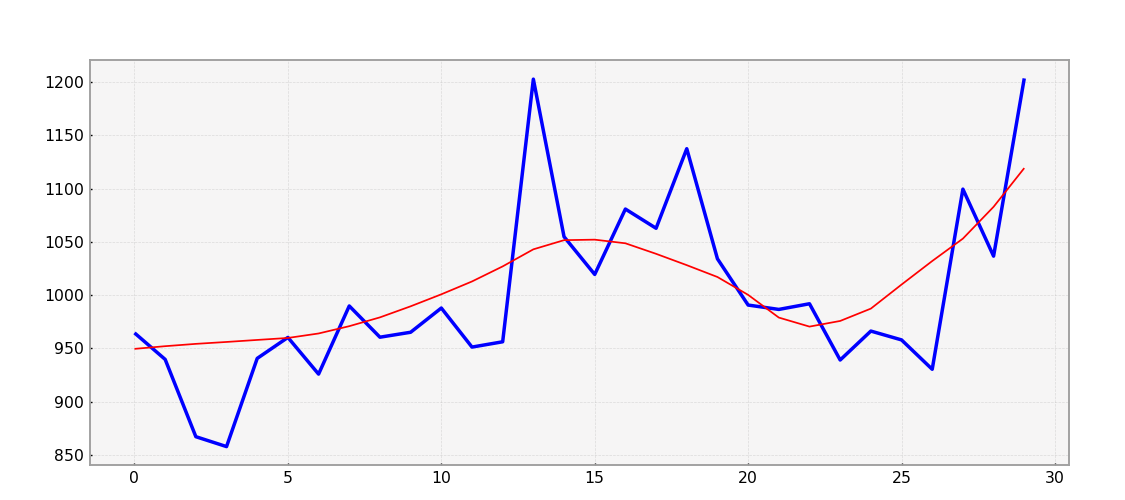

In [89]:
# Perform wavelet-based trend analysis

def wavelet_trend_analysis(data):
    wavelet = "db4"  #sym4 , coif3 , bior1.3, db4
    coeffs = pywt.wavedec(data, wavelet, level=3)  # Adjust wavelet and level as needed
    threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(data)))
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold)
    trend_data = pywt.waverec(coeffs, wavelet)  # Adjust wavelet as needed
    return trend_data

# Perform wavelet-based trend analysis on rainfall data
trend = wavelet_trend_analysis(dy.CHIRPS)

# Calculate trend properties
trend_diff = np.diff(trend)  # Difference between consecutive trend data points
trend_direction = 'Increasing' if np.mean(trend_diff) > 0 else 'Decreasing'
trend_magnitude = np.sum(trend_diff)  # Total change in the trend over the dataset

# Print trend properties
print("Trend Direction: ", trend_direction)
print("Trend Magnitude: ", trend_magnitude)

fig, (axs) = plt.subplots(1, 1, figsize=(9,4))
axs.plot(dy.CHIRPS, linewidth = 2, linestyle = "-", color="b")
axs.plot(trend, linewidth=1, linestyle = "-", color="r")

Trend Direction:  Increasing
Trend Magnitude:  42.438909869649365


<IPython.core.display.Javascript object>


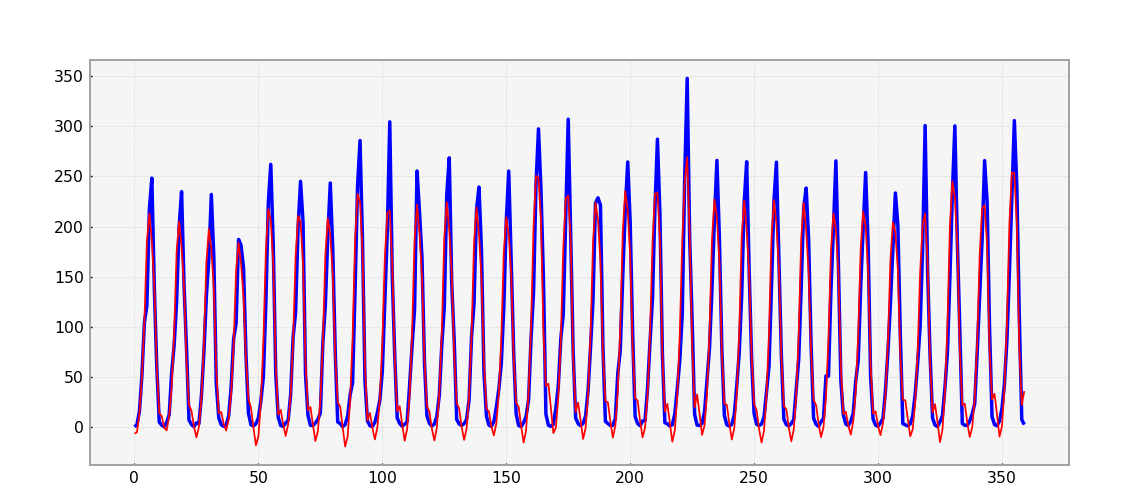

In [15]:
# Perform wavelet-based trend analysis

def wavelet_trend_analysis(data):
    wavelet = "db4"  #sym4 , coif3 , bior1.3, db4
    coeffs = pywt.wavedec(data, wavelet, level=2)  # Adjust wavelet and level as needed
    threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(data)))
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold)
    trend_data = pywt.waverec(coeffs, wavelet)  # Adjust wavelet as needed
    return trend_data

# Perform wavelet-based trend analysis on rainfall data
trend = wavelet_trend_analysis(dm.CHIRPS)

# Calculate trend properties
trend_diff = np.diff(trend)  # Difference between consecutive trend data points
trend_direction = 'Increasing' if np.mean(trend_diff) > 0 else 'Decreasing'
trend_magnitude = np.sum(trend_diff)  # Total change in the trend over the dataset

# Print trend properties
print("Trend Direction: ", trend_direction)
print("Trend Magnitude: ", trend_magnitude)

fig, (axs) = plt.subplots(1, 1, figsize=(9,4))
axs.plot(dm.CHIRPS, linewidth = 2, linestyle = "-", color="b")
axs.plot(trend, linewidth=1, linestyle = "-", color="r")

# Potential EvapoTranpiration (Hargreaves)

## Plot

In [104]:
start, end  = "1981-01-01", "2010-12-31"
workdir = r"C:\Users\benja\My Drive\DRIVE\THESIS\OBJECTIVES\SO2\HYPE\Result\DWT"
tmmea = pd.read_csv(workdir +"\\tmmean.csv", index_col=[0], parse_dates=True).loc[start:end]
tmmea = tmmea["tmmean"].apply(lambda x : x+0)

tmmin = pd.read_csv(workdir +"\\tmmin.csv", index_col=[0], parse_dates=True).loc[start:end]
tmmin = tmmin["tmmin"].apply(lambda x : x+0)

tmmax = pd.read_csv(workdir +"\\tmmax.csv", index_col=[0], parse_dates=True).loc[start:end]
tmmax = tmmax["tmmax"].apply(lambda x : x+0)

lat, latrad = 11.38 ,  11.38*np.pi/180 
pet = pyet.hargreaves(tmmea, tmmax, tmmin, latrad, method=1)
pet = pd.DataFrame(pet)

pet

,Hargreaves
DATE,
1981-01-01,3.661817
1981-01-02,3.481508
1981-01-03,3.803042
1981-01-04,4.183774
1981-01-05,4.220275
...,...
2010-12-27,4.773129
2010-12-28,4.391967
2010-12-29,4.476576


<IPython.core.display.Javascript object>


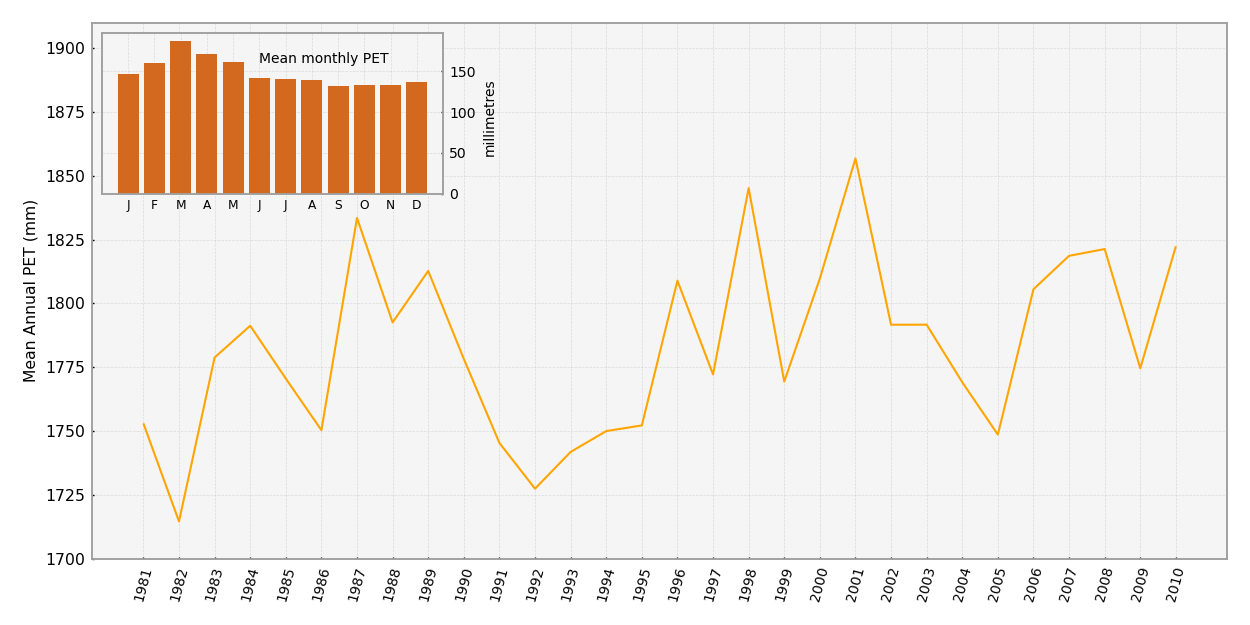

C:\Users\benja\AppData\Local\Temp\ipykernel_9592\613825084.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout();


In [105]:
df = pet.copy().reset_index()
dy = (df
      .groupby(pd.PeriodIndex(df['DATE'], freq='Y'))["Hargreaves"]
      .sum().round(2)
      .reset_index() 
     )
dm = (df
      .groupby(pd.PeriodIndex(df['DATE'], freq='M'))["Hargreaves"]
      .sum().round(2)
      .reset_index() 
     )

fig, (axs) = plt.subplots(1, 1, figsize=(10,5))
axs.plot(dy.index, dy["Hargreaves"], linewidth = 1.2, linestyle = "-", color="orange")
ticks = list(range(0, 30)) 
axs.set_xticks(ticks)
xlabels = list(range(1981, 2011))  
axs.set_xticklabels(xlabels, fontsize=8, rotation=75)
axs.set_ylabel("Mean Annual PET (mm)", fontsize = 9)
axs.set_ylim(1700, 1910)


## PLOT THE MONTHLY
pet['Month'] = pet.index.month
dd = pet.groupby(["Month"]).sum()/30
axsins = mpl_il.inset_axes(axs, width = "30%", height = "30%", loc = 2)
axsins.bar(dd.index, height = dd.Hargreaves, label = " ", color="chocolate")
xticks = list(np.linspace(1, 12, num=12))
xlabels = ["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"]
axsins.set_xticks(xticks, xlabels, fontsize=7, rotation=0)
axsins.yaxis.tick_right()
plt.yticks(fontsize = 8)
plt.text(6, 160, "Mean monthly PET", fontsize = 8)
plt.text(14.5, 50, "millimetres", fontsize=8, rotation=90)

plt.tight_layout();
# plt.savefig(outdir + "\IND PET.png", dpi= 600);

## Mann Kendall

In [107]:
## MK TEST

# print(mk.original_test(dy["Hargreaves"], alpha=0.05))
mk.seasonal_test(dm["Hargreaves"], period=12, alpha=0.05)
# print(mk.original_test(dm["Hargreaves"], alpha=0.3))

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=2.9859580039648392e-06, z=4.671783364036497, Tau=0.1739463601532567, s=908.0, var_s=37692.0, slope=0.07982142857142804, intercept=139.41100446428572)

## Discrete Wavelet Transform (DWT)

Trend Direction:  Increasing
Trend Magnitude:  55.63186113269899


C:\Users\benja\anaconda3\envs\thesis\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


<IPython.core.display.Javascript object>


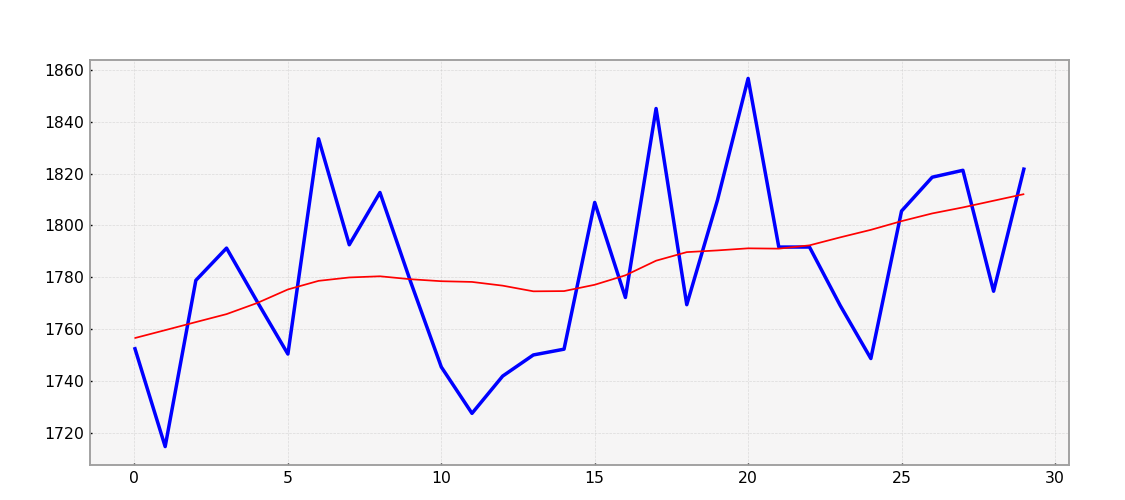

In [93]:
# Perform wavelet-based trend analysis

def wavelet_trend_analysis(data):
    
    wavelet = "db4"  #sym4 , coif3 , bior1.3, db4
    
    # Decompose the signal using the discrete wavelet transform (DWT)
    coeffs = pywt.wavedec(data, wavelet, level=3)  # Adjust wavelet and level as needed

    # Extract trend coefficients by thresholding the detail coefficients
    threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(data)))
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold)

    # Reconstruct the trend-enhanced data
    trend_data = pywt.waverec(coeffs, wavelet)  # Adjust wavelet as needed

    return trend_data

# Perform wavelet-based trend analysis on rainfall data
trend = wavelet_trend_analysis(dy.Hargreaves)

# Calculate trend properties
trend_diff = np.diff(trend)  # Difference between consecutive trend data points
trend_direction = 'Increasing' if np.mean(trend_diff) > 0 else 'Decreasing'
trend_magnitude = np.sum(trend_diff)  # Total change in the trend over the dataset

# Print trend properties
print("Trend Direction: ", trend_direction)
print("Trend Magnitude: ", trend_magnitude)

fig, (axs) = plt.subplots(1, 1, figsize=(9,4))
axs.plot(dy.Hargreaves, linewidth = 2, linestyle = "-", color="b")
axs.plot(trend, linewidth = 1, linestyle = "-", color="r")

Trend Direction:  Increasing
Trend Magnitude:  14.598347750742874


<IPython.core.display.Javascript object>


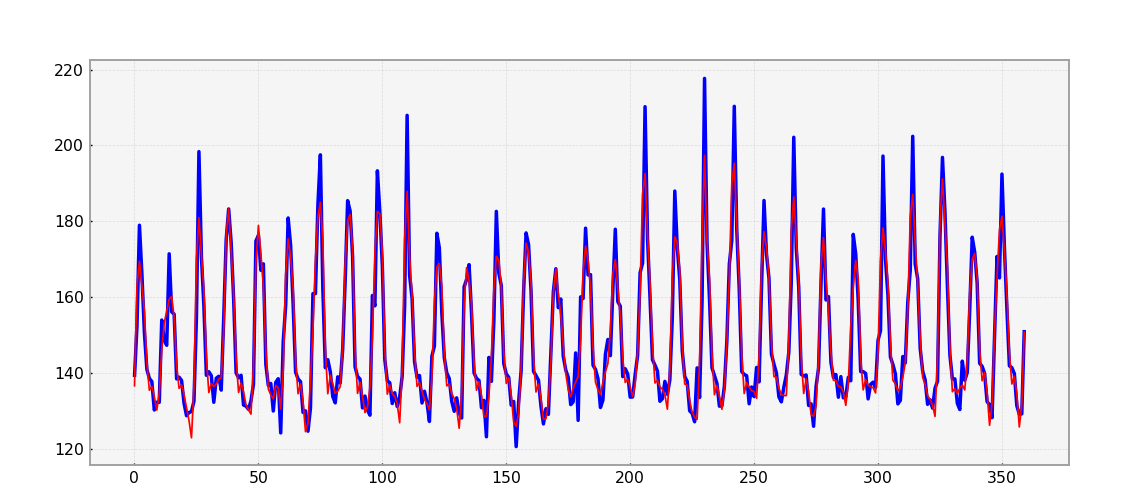

In [37]:
# Perform wavelet-based trend analysis

def wavelet_trend_analysis(data):
    
    wavelet = "db4"  #sym4 , coif3 , bior1.3, db4
    
    # Decompose the signal using the discrete wavelet transform (DWT)
    coeffs = pywt.wavedec(data, wavelet, level=1)  # Adjust wavelet and level as needed

    # Extract trend coefficients by thresholding the detail coefficients
    threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(data)))
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold)

    # Reconstruct the trend-enhanced data
    trend_data = pywt.waverec(coeffs, wavelet)  # Adjust wavelet as needed

    return trend_data

# Perform wavelet-based trend analysis on rainfall data
trend = wavelet_trend_analysis(dm.Hargreaves)

# Calculate trend properties
trend_diff = np.diff(trend)  # Difference between consecutive trend data points
trend_direction = 'Increasing' if np.mean(trend_diff) > 0 else 'Decreasing'
trend_magnitude = np.sum(trend_diff)  # Total change in the trend over the dataset

# Print trend properties
print("Trend Direction: ", trend_direction)
print("Trend Magnitude: ", trend_magnitude)

fig, (axs) = plt.subplots(1, 1, figsize=(9,4))
axs.plot(dm.Hargreaves, linewidth = 2, linestyle = "-", color="b")
axs.plot(trend, linewidth = 1, linestyle = "-", color="r")

# Temperature (ERA5)

## Plot

<IPython.core.display.Javascript object>


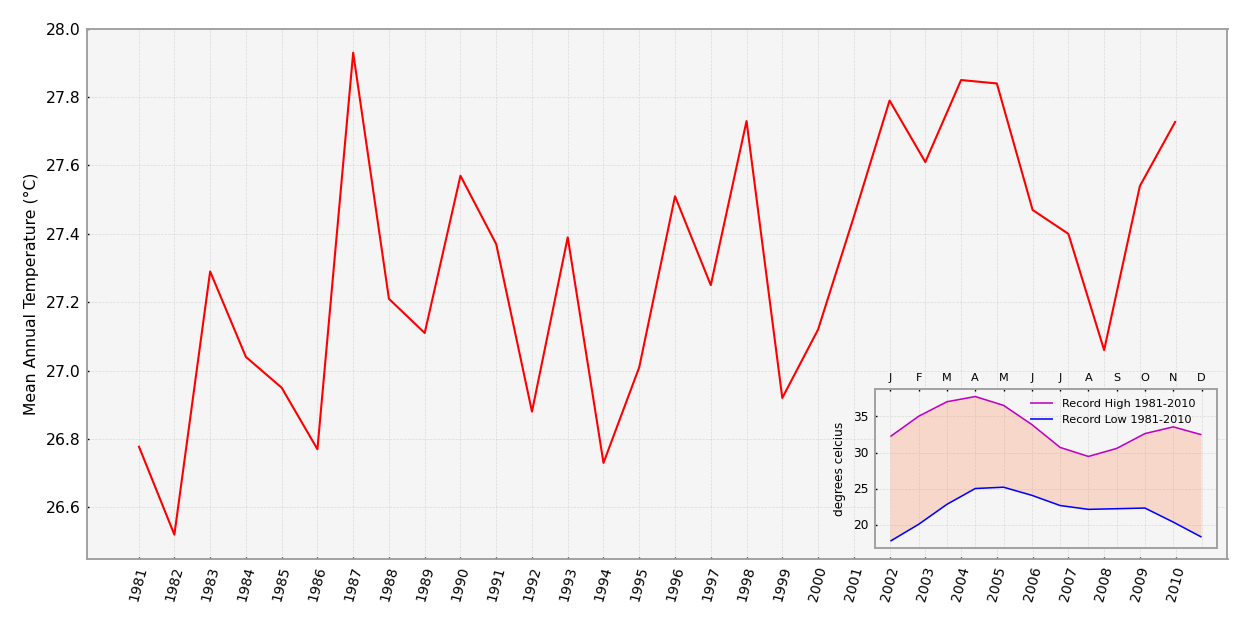

C:\Users\benja\AppData\Local\Temp\ipykernel_9592\3027799904.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [108]:
start, end  = "1981-01-01", "2010-12-31"
workdir = r"C:\Users\benja\My Drive\DRIVE\THESIS\OBJECTIVES\SO2\HYPE\Result\DWT"
tmmea = pd.read_csv(workdir +"\\tmmean.csv", index_col=[0], parse_dates=True).loc[start:end]
tmmin= pd.read_csv(workdir +"\\tmmin.csv", index_col=[0], parse_dates=True).loc[start:end]
tmmax= pd.read_csv(workdir +"\\tmmax.csv", index_col=[0], parse_dates=True).loc[start:end]

df = tmmea.reset_index()
dy = (df
      .groupby(pd.PeriodIndex(df['DATE'], freq='Y'))['tmmean']
      .mean().round(2)
      .reset_index() )

dm = (df
      .groupby(pd.PeriodIndex(df['DATE'], freq='M'))['tmmean']
      .mean().round(2)
      .reset_index() )

fig, (axs) = plt.subplots(1, 1, figsize=(10,5))
axs.plot(dy.index, dy["tmmean"], linewidth = 1.2, linestyle = "-", color="r")
ticks = list(range(0, 30)) 
xlabels = list(range(1981, 2011)) 
axs.set_xticks(ticks, xlabels, fontsize=8, rotation=75)
axs.set_ylabel("Mean Annual Temperature (°C)", fontsize = 9)


tmmin['Month'] = tmmin.index.month
Tmin = tmmin.groupby(["Month"]).mean().round(2)
tmmax['Month'] = tmmax.index.month
Tmax = tmmax.groupby(["Month"]).mean().round(2)

axsins = mpl_il.inset_axes(axs, width = "30%", height = "30%", loc = 4)
axsins.xaxis.tick_top()
axsins.plot(Tmax["tmmax"].values, "m", alpha = 1, lw = 0.9, label = "Record High 1981-2010" )
axsins.plot(Tmin["tmmin"].values, "b", alpha = 1, lw = 0.9, label ="Record Low 1981-2010" )
plt.fill_between(range(len(Tmin.tmmin)), Tmin.tmmin, Tmax.tmmax, facecolor='coral', alpha=0.25)
plt.legend(loc = [0.44, 0.75], fontsize = 6.5, frameon=False)
xticks = list(np.linspace(0, 11, num=12))
xlabels = ["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"]
axsins.set_xticks(xticks, xlabels, fontsize = 6.5, rotation=0)
axsins.set_ylabel("degrees celcius", fontsize = 7)
plt.yticks(fontsize = 7)

plt.tight_layout()
# plt.savefig(outdir + "\IND Mean Annual Temperature.png", dpi= 600);

##  Mann Kendall

In [109]:
## MK TEST
# print(mk.original_test(dy["tmmean"], alpha=0.05))
# print(mk.original_test(dm["tmmean"], alpha=0.17))
mk.seasonal_test(dm["tmmean"], period=12, alpha=0.05)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=7.303207327780115e-08, z=5.383547229357974, Tau=0.20038314176245212, s=1046.0, var_s=37678.666666666664, slope=0.022182539682539724, intercept=26.47818617724868)

## Discrete Wavelet Transform (DWT)

Trend Direction:  Increasing
Trend Magnitude:  0.9442205614763353


<IPython.core.display.Javascript object>


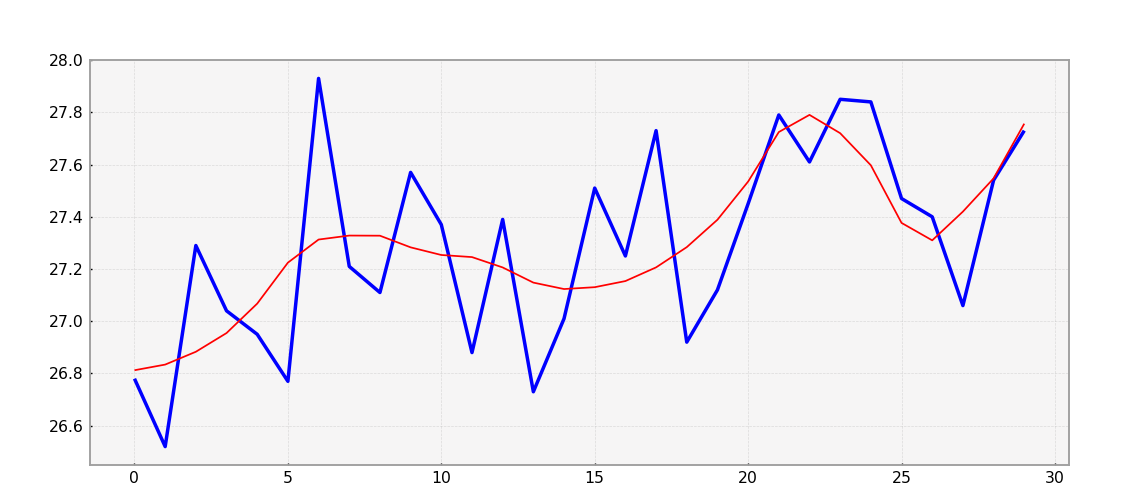

In [64]:
# Perform wavelet-based trend analysis

def wavelet_trend_analysis(data):
    
    wavelet = "db4"  #sym4 , coif3 , bior1.3, db4
    
    # Decompose the signal using the discrete wavelet transform (DWT)
    coeffs = pywt.wavedec(data, wavelet, level=2)  # Adjust wavelet and level as needed

    # Extract trend coefficients by thresholding the detail coefficients
    threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(data)))
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold)

    # Reconstruct the trend-enhanced data
    trend_data = pywt.waverec(coeffs, wavelet)  # Adjust wavelet as needed

    return trend_data

# Perform wavelet-based trend analysis on rainfall data
trend = wavelet_trend_analysis(dy.tmmean)

# Calculate trend properties
trend_diff = np.diff(trend)  # Difference between consecutive trend data points
trend_direction = 'Increasing' if np.mean(trend_diff) > 0 else 'Decreasing'
trend_magnitude = np.sum(trend_diff)  # Total change in the trend over the dataset

# Print trend properties
print("Trend Direction: ", trend_direction)
print("Trend Magnitude: ", trend_magnitude)

fig, (axs) = plt.subplots(1, 1, figsize=(9,4))
axs.plot(dy.tmmean, linewidth = 2, linestyle = "-", color="b")
axs.plot(trend, linewidth = 1, linestyle = "-", color="r")

Trend Direction:  Increasing
Trend Magnitude:  0.34685896888483825


<IPython.core.display.Javascript object>


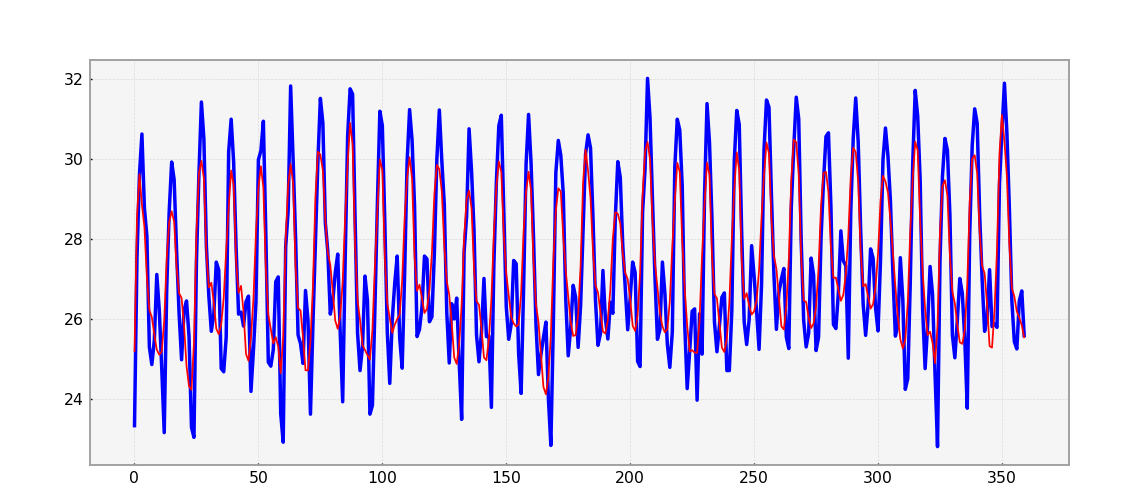

In [67]:
# Perform wavelet-based trend analysis

def wavelet_trend_analysis(data):
    
    wavelet = "db4"  #sym4 , coif3 , bior1.3, db4
    
    # Decompose the signal using the discrete wavelet transform (DWT)
    coeffs = pywt.wavedec(data, wavelet, level=2)  # Adjust wavelet and level as needed

    # Extract trend coefficients by thresholding the detail coefficients
    threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(data)))
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold)

    # Reconstruct the trend-enhanced data
    trend_data = pywt.waverec(coeffs, wavelet)  # Adjust wavelet as needed

    return trend_data

# Perform wavelet-based trend analysis on rainfall data
trend = wavelet_trend_analysis(dm.tmmean)

# Calculate trend properties
trend_diff = np.diff(trend)  # Difference between consecutive trend data points
trend_direction = 'Increasing' if np.mean(trend_diff) > 0 else 'Decreasing'
trend_magnitude = np.sum(trend_diff)  # Total change in the trend over the dataset

# Print trend properties
print("Trend Direction: ", trend_direction)
print("Trend Magnitude: ", trend_magnitude)

fig, (axs) = plt.subplots(1, 1, figsize=(9,4))
axs.plot(dm.tmmean, linewidth = 2, linestyle = "-", color="b")
axs.plot(trend, linewidth = 1, linestyle = "-", color="r")

# Discharge

## Plot

<IPython.core.display.Javascript object>


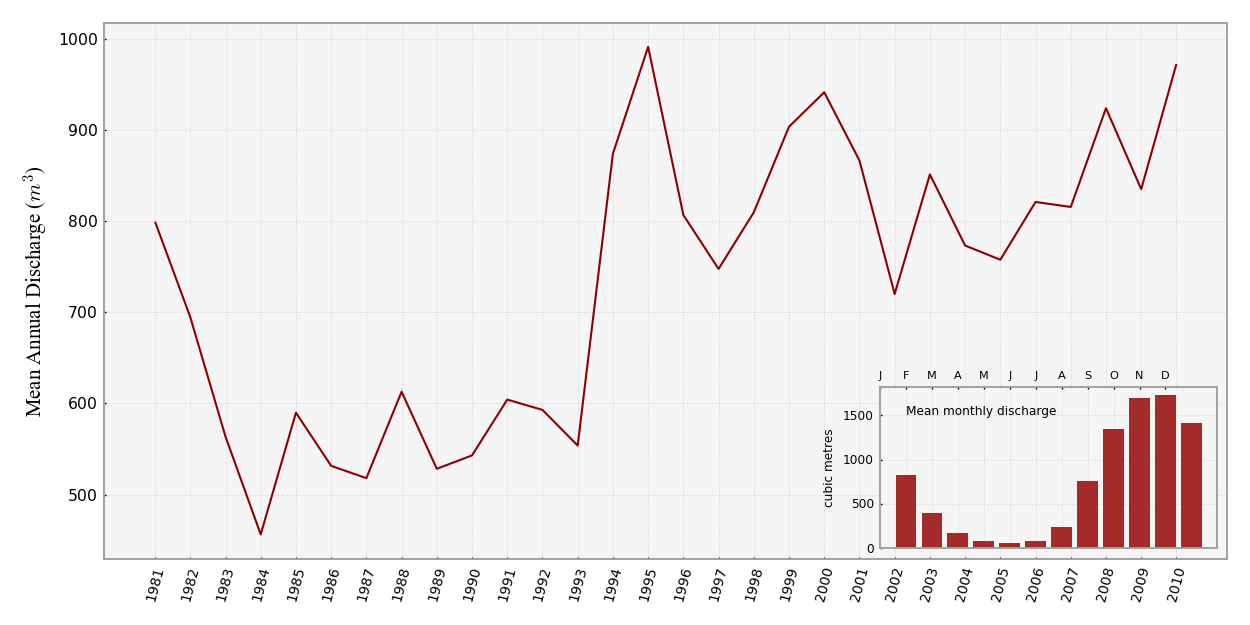

C:\Users\benja\AppData\Local\Temp\ipykernel_9592\1928083396.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout();


In [110]:
start, end = "1981-01-01", "2010-12-31"
workdir = r"C:\Users\benja\My Drive\DRIVE\THESIS\OBJECTIVES\SO2\Dataset\Discharge"
dire = pd.read_csv(workdir +"\Dire_Qj_1980_2022.csv", index_col=[0], parse_dates=True).loc[start:end]

df = dire.reset_index()
dy = (df
      .groupby(pd.PeriodIndex(df['DATE'], freq='Y'))['Obs']
      .mean().round(2)
      .reset_index()  #.set_index(["DATE"])
     )
dm = (df
      .groupby(pd.PeriodIndex(df['DATE'], freq='M'))['Obs']
      .mean().round(2)
      .reset_index()  
     )
fig, axs = plt.subplots(1, 1, figsize=(10,5))
axs.plot(dy["Obs"], linewidth = 1.2, linestyle = "-", color="darkred")
xticks = list(range(0, 30)) #list(np.linspace(0, 29, num=10))
axs.set_xticks(xticks)
xlabels = list(range(1981, 2011))  #["1981", "1984", "1987", "1991", "1994", "1997", "2000", "2004", "2007", "2010"] 
axs.set_xticklabels(xlabels, fontsize=8, rotation=75)
axs.set_ylabel("Mean Annual Discharge ($m^3$)",fontdict=font)
# axs.set_xlabel("Year", fontsize = 9)


## PLOT THE MONTHLY
dire['Month'] = dire.index.month
dd = dire.groupby(["Month"]).mean()
axsins = mpl_il.inset_axes(axs, width = "30%", height = "30%", loc = 4)
axsins.bar(dd.index, height = dd.Obs, label = " ", color="brown")
axsins.xaxis.tick_top()
xticks = list(np.linspace(0, 11, num=12))
xlabels = ["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"]
axsins.set_xticks(xticks, xlabels, fontsize = 6.5, rotation=0)
axsins.set_ylabel("cubic metres", fontsize = 7)
plt.yticks(fontsize = 7)
plt.text(1, 1500, "Mean monthly discharge", fontsize = 7)


plt.tight_layout();
# plt.savefig(outdir + "\IND Mean Annual Discharge Dire.png", dpi= 600);

## Mann Kendall

In [115]:
## MK TEST
print(mk.original_test(dy["Obs"], alpha=0.05))
# print(mk.original_test(dm["Obs"], alpha=0.05))
mk.seasonal_test(dm["Obs"], period=12, alpha=0.001)

Mann_Kendall_Test(trend='increasing', h=True, p=0.00023761439944935958, z=3.675252386721325, Tau=0.47586206896551725, s=207.0, var_s=3141.6666666666665, slope=13.313333333333333, intercept=572.3966666666668)


Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=10.30567431451834, Tau=0.38352490421455937, s=2002.0, var_s=37700.0, slope=6.610909090909091, intercept=384.9768181818182)

## Discrete Wavelet Transform (DWT)

Trend Direction:  Increasing
Trend Magnitude:  173.05999999999995


<IPython.core.display.Javascript object>


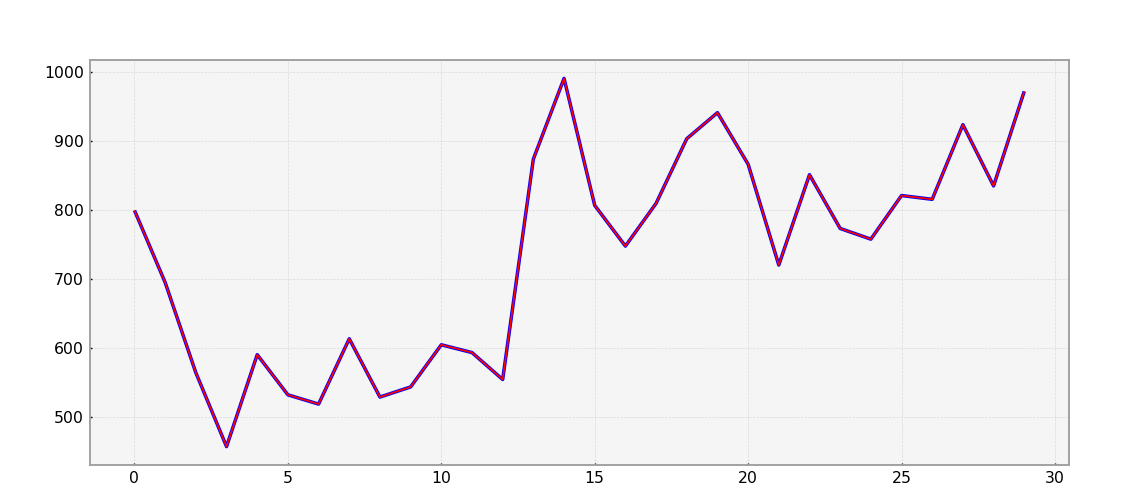

In [82]:
# Perform wavelet-based trend analysis

def wavelet_trend_analysis(data):
    
    wavelet = "db4"  #sym4 , coif3 , bior1.3, db4
    
    # Decompose the signal using the discrete wavelet transform (DWT)
    coeffs = pywt.wavedec(data, wavelet, level=0)  # Adjust wavelet and level as needed

    # Extract trend coefficients by thresholding the detail coefficients
    threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(data)))
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold)

    # Reconstruct the trend-enhanced data
    trend_data = pywt.waverec(coeffs, wavelet)  # Adjust wavelet as needed

    return trend_data

# Perform wavelet-based trend analysis on rainfall data
trend = wavelet_trend_analysis(dy.Obs)

# Calculate trend properties
trend_diff = np.diff(trend)  # Difference between consecutive trend data points
trend_direction = 'Increasing' if np.mean(trend_diff) > 0 else 'Decreasing'
trend_magnitude = np.sum(trend_diff)  # Total change in the trend over the dataset

# Print trend properties
print("Trend Direction: ", trend_direction)
print("Trend Magnitude: ", trend_magnitude)

fig, (axs) = plt.subplots(1, 1, figsize=(9,4))
axs.plot(dy.Obs, linewidth = 2, linestyle = "-", color="b")
axs.plot(trend, linewidth = 1, linestyle = "-", color="r")

Trend Direction:  Increasing
Trend Magnitude:  1732.2310004828087


<IPython.core.display.Javascript object>


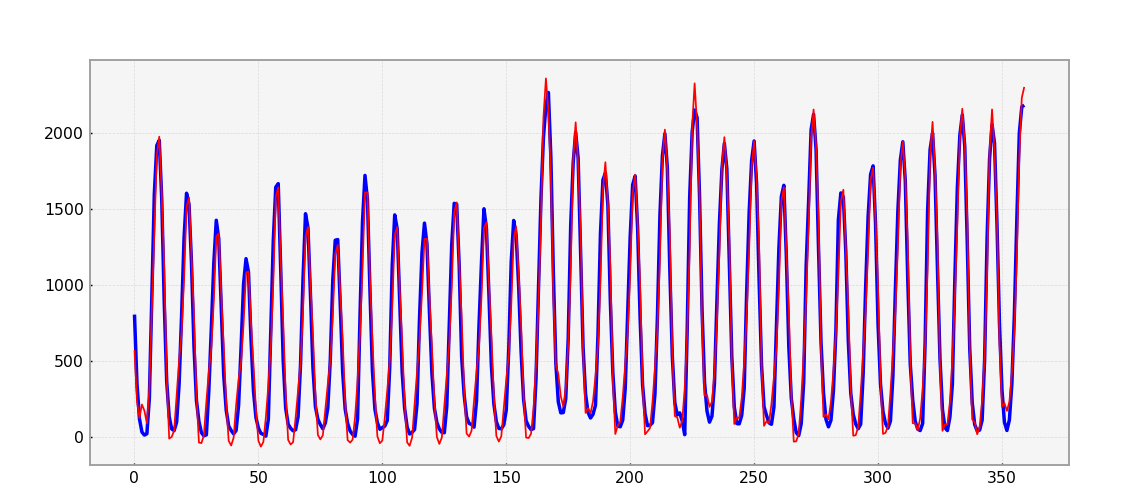

In [100]:
# Perform wavelet-based trend analysis

def wavelet_trend_analysis(data):
    
    wavelet = "db4"  #sym4 , coif3 , bior1.3, db4
    
    # Decompose the signal using the discrete wavelet transform (DWT)
    coeffs = pywt.wavedec(data, wavelet, level=2)  # Adjust wavelet and level as needed

    # Extract trend coefficients by thresholding the detail coefficients
    threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(data)))
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold)

    # Reconstruct the trend-enhanced data
    trend_data = pywt.waverec(coeffs, wavelet)  # Adjust wavelet as needed

    return trend_data

# Perform wavelet-based trend analysis on rainfall data
trend = wavelet_trend_analysis(dm.Obs)

# Calculate trend properties
trend_diff = np.diff(trend)  # Difference between consecutive trend data points
trend_direction = 'Increasing' if np.mean(trend_diff) > 0 else 'Decreasing'
trend_magnitude = np.sum(trend_diff)  # Total change in the trend over the dataset

# Print trend properties
print("Trend Direction: ", trend_direction)
print("Trend Magnitude: ", trend_magnitude)

fig, (axs) = plt.subplots(1, 1, figsize=(9,4))
axs.plot(dm.Obs, linewidth = 2, linestyle = "-", color="b")
axs.plot(trend, linewidth = 1, linestyle = "-", color="r")

# SPI - Dire

The standardized precipitation index (SPI) is calculated using the gamma distribution from the [scipy stats library](https://docs.scipy.org/doc/scipy/reference/stats.html). In fact any continuous distribution of this library can be chosen. However there are sensible choices for the SPI such as gamma, lognorm (lognormal), fisk (log-logistic) or pearson3 distribution. The precipitation time series is summed over a 30D rolling interval. 

For the literature we refer to: LLoyd-Hughes, B. and Saunders, M.A.: [A drought climatology for Europe](https://doi.org/10.1002/joc.846), 2002.

<IPython.core.display.Javascript object>


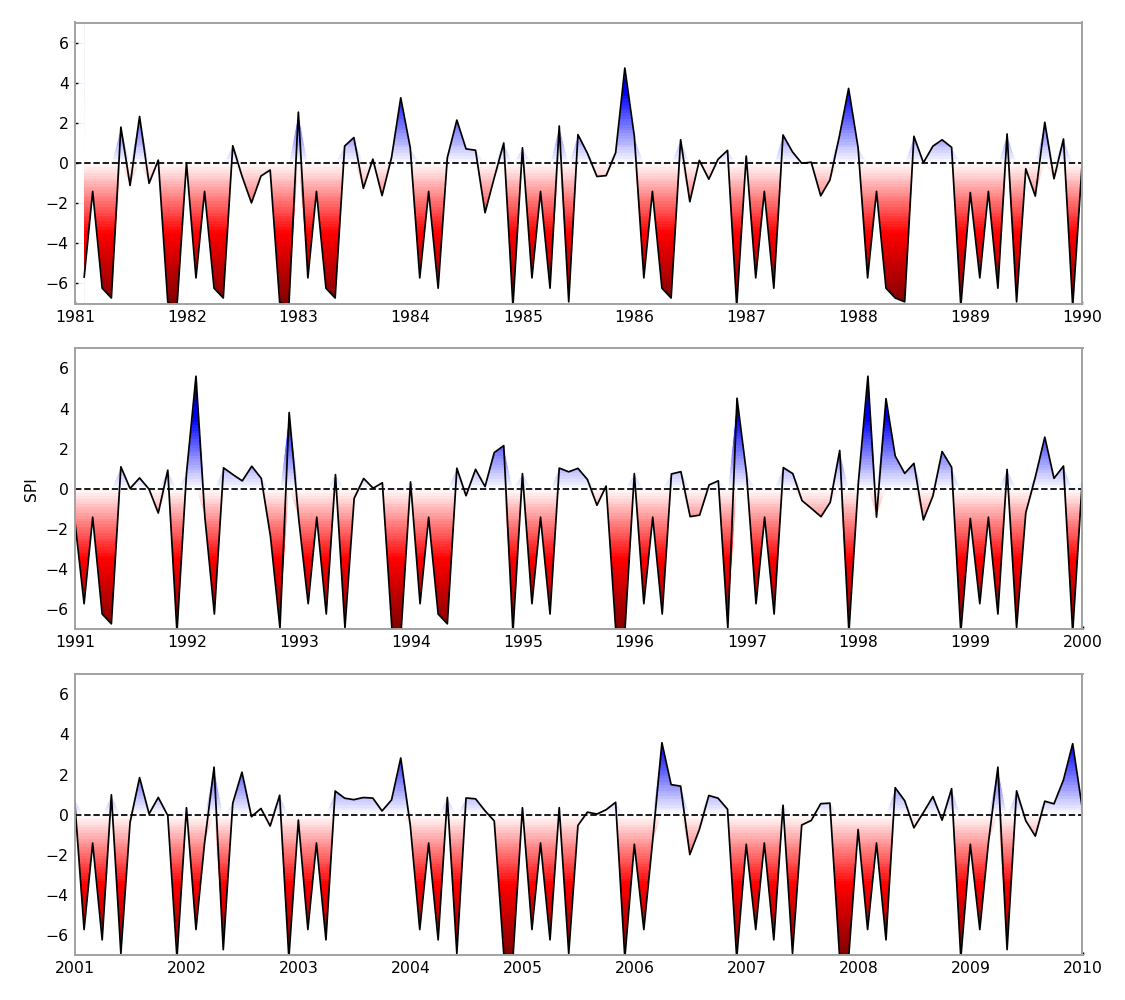

In [74]:
workdir = r"C:\Users\Ben\My Drive\THESIS\OBJECTIVES\SO2\Dataset\Historical\Dire"


df = pd.read_csv(workdir +"\Dire chirps.csv", index_col=[0], parse_dates=True).loc[start:end]
df = df.resample("M").sum().squeeze()
# spi1 = si.spi(df, dist=scs.pearson3)

spi = si.spi(df, dist=scs.pearson3)

f, ax = plt.subplots(3, 1, figsize=(9, 8), sharex=False)
si.plot.si(spi, ax=ax[0], bound=7)
ax[0].set_xlim(pd.to_datetime(["1981", "1990"]))

si.plot.si(spi, ax=ax[1], bound=7)
ax[1].set_xlim(pd.to_datetime(["1991", "2000"]))
ax[1].set_ylabel("SPI", fontsize=9)

si.plot.si(spi, ax=ax[2], bound=7)
ax[2].set_xlim(pd.to_datetime(["2001", "2010"]))

# [ax[i].set_ylabel(n, fontsize=9) for i,n in enumerate(["SPI", "SPI", "SPI"])]; # [x.grid() for x in ax]

plt.tight_layout();
# plt.savefig(output_dir + "\SPI CHIRPS Dire.png", dpi= 600);